In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Nomes para as colunas
columns = ["Estacao","Data","Hora","Prec","TempMax","TempMin","Insolacao","EvapoPiche","TempCompMedia",
           "UmidRelatMedia", "VelocVento", "Missing"]

#Tipos de dados em cada coluna
types = {"Hora":np.uint16,"Prec":np.float64,"TempMax":np.float64,"TempMin":np.float64,"Insolacao":np.float64,
         "EvapoPiche":np.float64,"TempCompMedia":np.float64,"UmidRelatMedia":np.float64,"VelocVento":np.float64}

#Leitura do arquivo csv
dataSet = pd.read_csv("Dados_INMET/Diarios/INMET-Dados_Diarios_Natal_1968-2018.csv",sep=';',skiprows=48, nrows = 27003,
          usecols = columns[1:11], names=columns, dtype = types)

In [3]:
#Transformando data em variável do tipo datetime
dataSet["Data"] = pd.to_datetime(dataSet["Data"], format = "%d/%m/%Y")

In [4]:
#Verificando dados
dataSet.head()

,Data,Hora,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
0,1968-01-01,0,NaN,30.6,NaN,11.1,4.4,25.14,73.50,2.666667
1,1968-01-01,1200,0.0,NaN,21.4,NaN,NaN,NaN,NaN,NaN
2,1968-01-02,0,NaN,31.0,NaN,11.9,6.5,24.92,74.75,1.666667
3,1968-01-02,1200,0.0,NaN,19.6,NaN,NaN,NaN,NaN,NaN
4,1968-01-03,0,NaN,31.6,NaN,11.3,5.0,24.90,77.25,2.333333


In [5]:
#Verificando o tipo dos dados
dataSet.dtypes

Data              datetime64[ns]
Hora                      uint16
Prec                     float64
TempMax                  float64
TempMin                  float64
Insolacao                float64
EvapoPiche               float64
TempCompMedia            float64
UmidRelatMedia           float64
VelocVento               float64
dtype: object

In [6]:
#Separando os dados em dois dataframes, um para as 00:00 h e outro para as 12:00 h
dataSet00, dataSet12 = dataSet[dataSet["Hora"] == 0], dataSet[dataSet["Hora"] == 1200]

In [7]:
#Verificando dataframe para os dados disponibilizados às 00:00 h
dataSet00.head()

,Data,Hora,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
0,1968-01-01,0,NaN,30.6,NaN,11.1,4.4,25.14,73.50,2.666667
2,1968-01-02,0,NaN,31.0,NaN,11.9,6.5,24.92,74.75,1.666667
4,1968-01-03,0,NaN,31.6,NaN,11.3,5.0,24.90,77.25,2.333333
6,1968-01-04,0,NaN,31.2,NaN,10.3,4.0,24.82,80.75,3.666667
8,1968-01-05,0,NaN,30.8,NaN,11.0,4.2,24.78,76.00,4.000000


In [8]:
#Verificando dataframe para os dados disponibilizados às 12:00 h
dataSet12.head()

,Data,Hora,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
1,1968-01-01,1200,0.0,NaN,21.4,NaN,NaN,NaN,NaN,NaN
3,1968-01-02,1200,0.0,NaN,19.6,NaN,NaN,NaN,NaN,NaN
5,1968-01-03,1200,0.0,NaN,18.5,NaN,NaN,NaN,NaN,NaN
7,1968-01-04,1200,0.0,NaN,20.7,NaN,NaN,NaN,NaN,NaN
9,1968-01-05,1200,0.0,NaN,19.9,NaN,NaN,NaN,NaN,NaN


In [9]:
#Transformando a data no índice de cada dataframe
dataSet00 = dataSet00.set_index("Data")
dataSet12 = dataSet12.set_index("Data")

In [10]:
#Descartando a coluna "Hora"
dataSet00, dataSet12 = dataSet00.drop(columns = "Hora"), dataSet12.drop(columns = "Hora")

In [11]:
#Juntando os dados em um mesmo dataframe (no caso, o dataSet00)
for i in dataSet00.index:
    try:
        dataSet00["Prec"].loc[i] = dataSet12["Prec"].loc[i]
        dataSet00["TempMin"].loc[i] = dataSet12["TempMin"].loc[i]
    except:
        print("Data " + str(i.day) + "/" + str(i.month) + "/" + str(i.year) + " Não encontrada!")

Data 5/7/1986 Não encontrada!
Data 20/7/1986 Não encontrada!
Data 3/6/1989 Não encontrada!
Data 12/6/1989 Não encontrada!
Data 4/12/1992 Não encontrada!
Data 26/5/2018 Não encontrada!
Data 1/8/2018 Não encontrada!
Data 27/10/2018 Não encontrada!


In [12]:
#Atribuindo à variável dataSet o DataFrame atualizado
dataSet = dataSet00

In [13]:
#Eliminando dias que estejam faltando variáveis
dataSet = dataSet.dropna()

In [14]:
#Verificando DataFrame
dataSet.head()

,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
Data,,,,,,,,
1968-01-01,0.0,30.6,21.4,11.1,4.4,25.14,73.50,2.666667
1968-01-02,0.0,31.0,19.6,11.9,6.5,24.92,74.75,1.666667
1968-01-03,0.0,31.6,18.5,11.3,5.0,24.90,77.25,2.333333
1968-01-04,0.0,31.2,20.7,10.3,4.0,24.82,80.75,3.666667
1968-01-05,0.0,30.8,19.9,11.0,4.2,24.78,76.00,4.000000


In [15]:
#Transformando a coluna Data de volta em uma coluna de informações do dataSet
dataSet = dataSet.reset_index()

In [16]:
#Transformando cada elemento da label Data na quantidade de dias passados a contar da data 01/01/1968
data_referencia = datetime.strptime('1968-01-01', '%Y-%m-%d')
for i in dataSet.index:
    dataSet.loc[i, "Data"] = (dataSet.loc[i, "Data"] - data_referencia).days

In [17]:
#Verificando DataFrame
dataSet

,Data,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
0,0,0.0,30.6,21.4,11.1,4.4,25.14,73.50,2.666667
1,1,0.0,31.0,19.6,11.9,6.5,24.92,74.75,1.666667
2,2,0.0,31.6,18.5,11.3,5.0,24.90,77.25,2.333333
3,3,0.0,31.2,20.7,10.3,4.0,24.82,80.75,3.666667
4,4,0.0,30.8,19.9,11.0,4.2,24.78,76.00,4.000000
5,5,0.0,31.4,19.8,11.2,5.0,25.08,76.50,1.000000
6,6,0.0,31.4,19.8,10.6,5.8,24.92,78.75,1.333333
7,7,0.0,31.6,19.8,1.5,4.6,25.50,76.50,2.333333
8,8,0.4,31.0,21.8,9.7,5.2,25.80,83.75,4.000000
9,9,0.0,31.9,19.6,11.0,3.6,25.46,80.25,3.666667


In [18]:
#Separando a variável que será prevista (Y) em função das demais variáveis (X)
X = np.array(dataSet.drop(columns = "TempMax"))
Y = np.array(dataSet["TempMax"])

In [19]:
#Visualizando dados
print(X)
print(type(X))
print(X.shape)

[[0.000000e+00 0.000000e+00 2.140000e+01 ... 2.514000e+01 7.350000e+01
  2.666667e+00]
 [1.000000e+00 0.000000e+00 1.960000e+01 ... 2.492000e+01 7.475000e+01
  1.666667e+00]
 [2.000000e+00 0.000000e+00 1.850000e+01 ... 2.490000e+01 7.725000e+01
  2.333333e+00]
 ...
 [1.825400e+04 2.000000e+00 2.620000e+01 ... 2.764000e+01 8.200000e+01
  3.050000e+00]
 [1.825500e+04 5.000000e-01 2.670000e+01 ... 2.778000e+01 8.450000e+01
  3.266667e+00]
 [1.825600e+04 6.000000e+00 2.470000e+01 ... 2.762000e+01 8.425000e+01
  4.133333e+00]]
<class 'numpy.ndarray'>
(11911, 8)


In [20]:
#Visualizando dados
print(Y)
print(type(Y))
print(Y.shape)

[30.6 31.  31.6 ... 30.2 30.  30. ]
<class 'numpy.ndarray'>
(11911,)


In [21]:
#Separando conjunto de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

In [22]:
#Efetuando uma transformação do tipo: z = (x - u) / s, normalizando em termos do desvio padrão
sc = StandardScaler()
X_train[:,1:] = sc.fit_transform(X_train[:,1:])
X_test[:,1:] = sc.transform(X_test[:,1:])

In [23]:
#Criando um modelo de MLP
mlp = Sequential()
#Adicionando a camada de entrada
mlp.add(Dense(activation = 'relu', input_dim = 8, units = 32, kernel_initializer = 'uniform'))
#Adicionando a segunda camada
mlp.add(Dense(activation = 'relu', units = 16, kernel_initializer = 'uniform'))
#Adicionando a terceira camada
mlp.add(Dense(activation = 'relu', units = 8, kernel_initializer = 'uniform'))
#Adicionando a quarta camada
mlp.add(Dense(activation = 'relu', units = 4, kernel_initializer = 'uniform'))
#Adicionando a camada de saída
mlp.add(Dense(units = 1, kernel_initializer='normal'))
# Compilando o modelo
mlp.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
#Mostrando um sumário do modelo de MLP criada
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Treinando a MLP rede, a partir do modelo de MLP criado
rede = mlp.fit(X_train, Y_train, epochs=100, verbose=1, validation_split=0.1)

Train on 9647 samples, validate on 1072 samples
Epoch 1/100
9647/9647 [==============================] - 1s 85us/step - loss: 228.9908 - mean_squared_error: 228.9908 - mean_absolute_error: 11.6635 - val_loss: 134.0794 - val_mean_squared_error: 134.0794 - val_mean_absolute_error: 8.7589
Epoch 2/100
9647/9647 [==============================] - 1s 71us/step - loss: 129.0862 - mean_squared_error: 129.0862 - mean_absolute_error: 8.6248 - val_loss: 132.7285 - val_mean_squared_error: 132.7285 - val_mean_absolute_error: 8.5883
Epoch 3/100
9647/9647 [==============================] - 1s 73us/step - loss: 127.0681 - mean_squared_error: 127.0681 - mean_absolute_error: 8.5516 - val_loss: 129.5616 - val_mean_squared_error: 129.5616 - val_mean_absolute_error: 8.5262
Epoch 4/100
9647/9647 [==============================] - 1s 70us/step - loss: 124.2689 - mean_squared_error: 124.2689 - mean_absolute_error: 8.4586 - val_loss: 126.0339 - val_mean_squared_error: 126.0339 - val_mean_absolute_error: 8.4994

Epoch 36/100
9647/9647 [==============================] - 1s 84us/step - loss: 0.5001 - mean_squared_error: 0.5001 - mean_absolute_error: 0.5472 - val_loss: 0.3926 - val_mean_squared_error: 0.3926 - val_mean_absolute_error: 0.4845
Epoch 37/100
9647/9647 [==============================] - 1s 75us/step - loss: 0.4692 - mean_squared_error: 0.4692 - mean_absolute_error: 0.5295 - val_loss: 0.9230 - val_mean_squared_error: 0.9230 - val_mean_absolute_error: 0.7896
Epoch 38/100
9647/9647 [==============================] - 1s 82us/step - loss: 0.4728 - mean_squared_error: 0.4728 - mean_absolute_error: 0.5316 - val_loss: 0.3633 - val_mean_squared_error: 0.3633 - val_mean_absolute_error: 0.4600
Epoch 39/100
9647/9647 [==============================] - 1s 89us/step - loss: 0.4760 - mean_squared_error: 0.4760 - mean_absolute_error: 0.5337 - val_loss: 0.5148 - val_mean_squared_error: 0.5148 - val_mean_absolute_error: 0.5693
Epoch 40/100
9647/9647 [==============================] - 1s 75us/step - los

9647/9647 [==============================] - 1s 72us/step - loss: 0.3018 - mean_squared_error: 0.3018 - mean_absolute_error: 0.4175 - val_loss: 0.3656 - val_mean_squared_error: 0.3656 - val_mean_absolute_error: 0.4861
Epoch 72/100
9647/9647 [==============================] - 1s 72us/step - loss: 0.3042 - mean_squared_error: 0.3042 - mean_absolute_error: 0.4152 - val_loss: 0.2525 - val_mean_squared_error: 0.2525 - val_mean_absolute_error: 0.3691
Epoch 73/100
9647/9647 [==============================] - 1s 74us/step - loss: 0.3086 - mean_squared_error: 0.3086 - mean_absolute_error: 0.4205 - val_loss: 0.3095 - val_mean_squared_error: 0.3095 - val_mean_absolute_error: 0.4277
Epoch 74/100
9647/9647 [==============================] - 1s 72us/step - loss: 0.3037 - mean_squared_error: 0.3037 - mean_absolute_error: 0.4167 - val_loss: 0.2349 - val_mean_squared_error: 0.2349 - val_mean_absolute_error: 0.3568
Epoch 75/100
9647/9647 [==============================] - 1s 72us/step - loss: 0.3012 - m

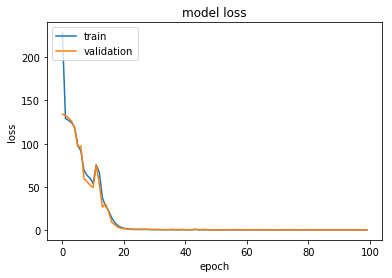

In [25]:
#Mostrando o processo de treino graficamente
plt.plot(rede.history['loss'])
plt.plot(rede.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
#Fazendo uma previsão com base nos dados de teste
Y_previsto = mlp.predict(X_test)

In [27]:
#Mostrando o array de dados previstos
print(Y_previsto)

[[27.175299]
 [28.606716]
 [30.71345 ]
 ...
 [29.393633]
 [28.056917]
 [28.252077]]


In [29]:
#Mostrando o array de dados reais que deveriam ter sido previstos no passo anterior
print(Y_test)

[26.8 28.8 30.6 ... 29.2 28.  28.8]


In [30]:
#Calculando e mostrando o erro mínimo quadrático entre o Y previsto e o Y real
mse = mean_squared_error(Y_previsto, Y_test)
print(mse)

0.294904597275889
